In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import re
from sklearn.preprocessing import StandardScaler

# Generating some example data
df = pd.read_csv('fifa_data.csv')

In [2]:
df

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,18202,238813,J. Lundstram,19,https://cdn.sofifa.org/players/4/19/238813.png,England,https://cdn.sofifa.org/flags/14.png,47,65,Crewe Alexandra,...,45.0,40.0,48.0,47.0,10.0,13.0,7.0,8.0,9.0,€143K
18203,18203,243165,N. Christoffersson,19,https://cdn.sofifa.org/players/4/19/243165.png,Sweden,https://cdn.sofifa.org/flags/46.png,47,63,Trelleborgs FF,...,42.0,22.0,15.0,19.0,10.0,9.0,9.0,5.0,12.0,€113K
18204,18204,241638,B. Worman,16,https://cdn.sofifa.org/players/4/19/241638.png,England,https://cdn.sofifa.org/flags/14.png,47,67,Cambridge United,...,41.0,32.0,13.0,11.0,6.0,5.0,10.0,6.0,13.0,€165K
18205,18205,246268,D. Walker-Rice,17,https://cdn.sofifa.org/players/4/19/246268.png,England,https://cdn.sofifa.org/flags/14.png,47,66,Tranmere Rovers,...,46.0,20.0,25.0,27.0,14.0,6.0,14.0,8.0,9.0,€143K


In [3]:
df = df.drop(['ID','Name','Photo','Nationality','Flag','Club','Club Logo','Special',
       'Preferred Foot','Work Rate', 'Body Type', 'Real Face','Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'GKReflexes','Release Clause'],axis = 1)
df = df.dropna()


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18147 entries, 0 to 18206
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                18147 non-null  int64  
 1   Age                       18147 non-null  int64  
 2   Overall                   18147 non-null  int64  
 3   Potential                 18147 non-null  int64  
 4   Value                     18147 non-null  object 
 5   Wage                      18147 non-null  object 
 6   International Reputation  18147 non-null  float64
 7   Weak Foot                 18147 non-null  float64
 8   Skill Moves               18147 non-null  float64
 9   Position                  18147 non-null  object 
dtypes: float64(3), int64(4), object(3)
memory usage: 1.5+ MB


In [5]:
def value_num(text):
    
    if 'K' in text:
        value =0.001
    else:
        value =1
    
    # Remove "$" and "k" characters using regular expression
    text_stripped = re.sub(r'[\$\s\,M]', '', text)
    
    # Find numeric portions and convert to float
    numeric_values = [float(match) for match in re.findall(r'\d+\.\d+|\d+', text_stripped)]
    
    # Sum numeric values if there are multiple, or return a single float if there's only one
    result = sum(numeric_values) if numeric_values else None
    
    return result*value

In [6]:
def get_position(text):
    if text == 'RCB' or text == 'LCB':
        text = 'CB'
    elif text == 'RDM' or text == 'LDM':
        text = 'CDM'
    elif text == 'RCM' or text == 'LCM':
        text = 'CM'
    elif text == 'RS' or text == 'LS':
        text = 'ST'
    elif text == 'RAM' or text == 'LAM':
        text = 'CAM'
    elif text == 'RF' or text == 'LF':
        text = 'CF'
    
    return text

In [7]:
df['Value_float'] = df['Value'].apply(value_num)
#df['Release Clause_float'] = df['Release Clause'].apply(value_num)
df['Wage_float'] = df['Wage'].apply(value_num)
df.dtypes

Unnamed: 0                    int64
Age                           int64
Overall                       int64
Potential                     int64
Value                        object
Wage                         object
International Reputation    float64
Weak Foot                   float64
Skill Moves                 float64
Position                     object
Value_float                 float64
Wage_float                  float64
dtype: object

In [8]:
df = df.drop(['Unnamed: 0','Value','Wage'],axis = 1)

In [9]:
df

,Age,Overall,Potential,International Reputation,Weak Foot,Skill Moves,Position,Value_float,Wage_float
0,31,94,94,5.0,4.0,4.0,RF,110.50,0.565
1,33,94,94,5.0,4.0,5.0,ST,77.00,0.405
2,26,92,93,5.0,5.0,5.0,LW,118.50,0.290
3,27,91,93,4.0,3.0,1.0,GK,72.00,0.260
4,27,91,92,4.0,5.0,4.0,RCM,102.00,0.355
...,...,...,...,...,...,...,...,...,...
18202,19,47,65,1.0,2.0,2.0,CM,0.06,0.001
18203,19,47,63,1.0,2.0,2.0,ST,0.06,0.001
18204,16,47,67,1.0,3.0,2.0,ST,0.06,0.001
18205,17,47,66,1.0,3.0,2.0,RW,0.06,0.001


In [10]:
df = df.drop_duplicates()

In [11]:
df['Position_modified'] = df['Position'].apply(get_position)
df.sample(10)

C:\Users\Steven Ayman\AppData\Local\Temp\ipykernel_4288\1364071301.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Position_modified'] = df['Position'].apply(get_position)


,Age,Overall,Potential,International Reputation,Weak Foot,Skill Moves,Position,Value_float,Wage_float,Position_modified
5963,28,69,69,1.0,2.0,2.0,RB,0.825,0.005,RB
8579,21,67,72,1.0,3.0,2.0,RCB,0.875,0.002,CB
17825,18,52,68,1.0,3.0,2.0,ST,0.100,0.001,ST
2947,23,73,79,1.0,3.0,2.0,CB,4.700,0.013,CB
11294,24,64,66,1.0,3.0,1.0,GK,0.400,0.002,GK
16237,21,58,69,1.0,3.0,2.0,RB,0.190,0.002,RB
8868,25,66,69,1.0,3.0,3.0,RM,0.800,0.002,RM
11198,25,64,67,1.0,2.0,2.0,LB,0.475,0.001,LB
1097,23,77,81,2.0,4.0,4.0,LM,11.500,0.039,LM
13597,22,62,70,1.0,2.0,2.0,CB,0.375,0.002,CB


In [12]:
df['Position_modified'].value_counts()

Position_modified
CB     2911
ST     2446
CM     2099
GK     1862
CDM    1402
LB     1263
RB     1245
RM     1100
LM     1072
CAM     978
LW      379
RW      368
CF      105
RWB      87
LWB      77
Name: count, dtype: int64

In [13]:
df = df.drop('Position',axis = 1)

In [14]:

df['Value_float'].describe()

count    17394.000000
mean         2.498189
std          5.706979
min          0.000000
25%          0.325000
50%          0.725000
75%          2.200000
max        118.500000
Name: Value_float, dtype: float64

In [15]:
df_dummies = pd.get_dummies(df['Position_modified'])

df = pd.concat([df, df_dummies], axis=1)
df

,Age,Overall,Potential,International Reputation,Weak Foot,Skill Moves,Value_float,Wage_float,Position_modified,CAM,...,GK,LB,LM,LW,LWB,RB,RM,RW,RWB,ST
0,31,94,94,5.0,4.0,4.0,110.50,0.565,CF,False,...,False,False,False,False,False,False,False,False,False,False
1,33,94,94,5.0,4.0,5.0,77.00,0.405,ST,False,...,False,False,False,False,False,False,False,False,False,True
2,26,92,93,5.0,5.0,5.0,118.50,0.290,LW,False,...,False,False,False,True,False,False,False,False,False,False
3,27,91,93,4.0,3.0,1.0,72.00,0.260,GK,False,...,True,False,False,False,False,False,False,False,False,False
4,27,91,92,4.0,5.0,4.0,102.00,0.355,CM,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,19,47,65,1.0,2.0,2.0,0.06,0.001,CM,False,...,False,False,False,False,False,False,False,False,False,False
18203,19,47,63,1.0,2.0,2.0,0.06,0.001,ST,False,...,False,False,False,False,False,False,False,False,False,True
18204,16,47,67,1.0,3.0,2.0,0.06,0.001,ST,False,...,False,False,False,False,False,False,False,False,False,True
18205,17,47,66,1.0,3.0,2.0,0.06,0.001,RW,False,...,False,False,False,False,False,False,False,True,False,False


In [16]:
df = df.drop(['Position_modified'],axis = 1)

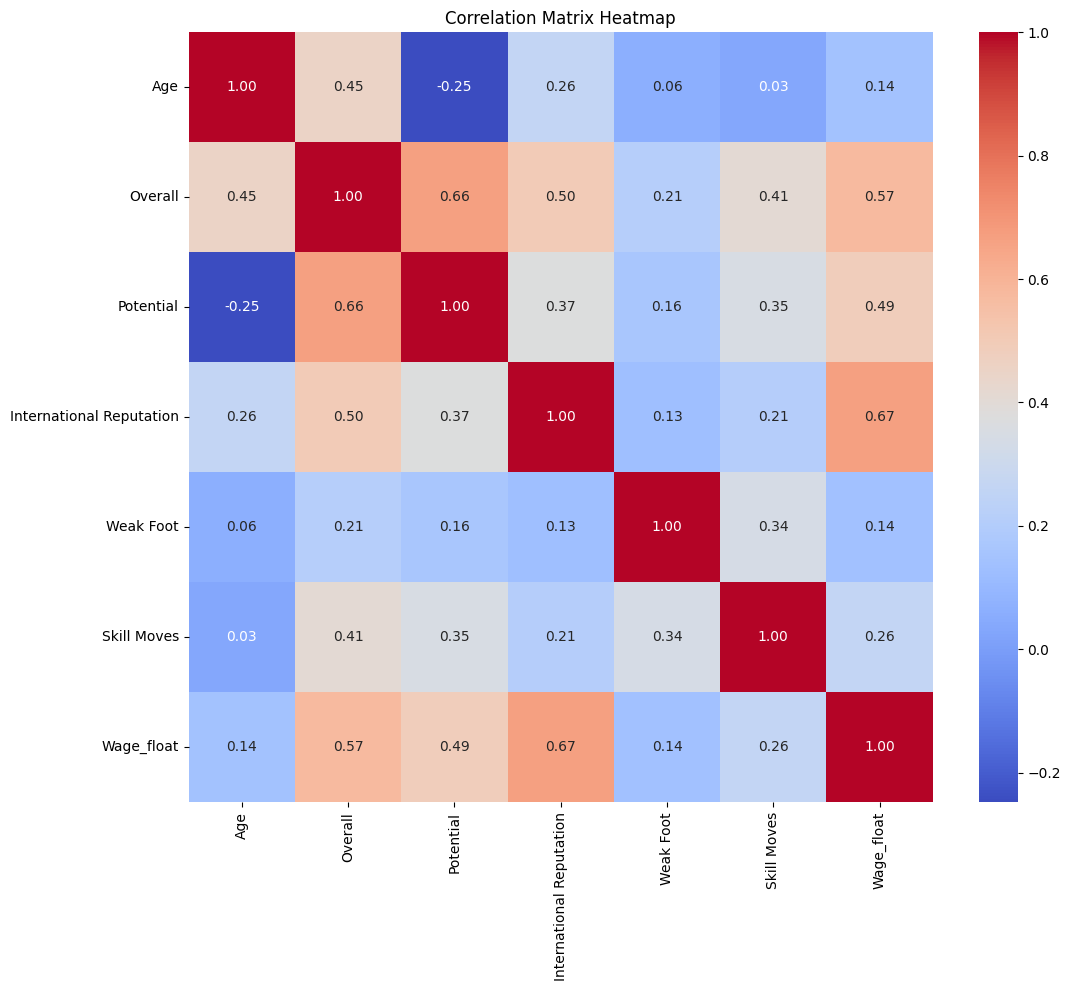

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'df' with the specified columns
columns_of_interest = ['Age', 'Overall', 'Potential', 'International Reputation', 'Weak Foot',
                        'Skill Moves', 'Wage_float']

# Select the specified columns from the DataFrame
selected_columns = df[columns_of_interest]

# Create a correlation matrix
correlation_matrix = selected_columns.corr()

# Create a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()


In [18]:
X = df.drop('Overall',axis = 1)
y = df['Overall']


In [19]:
X.columns

Index(['Age', 'Potential', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Value_float', 'Wage_float', 'CAM', 'CB', 'CDM', 'CF',
       'CM', 'GK', 'LB', 'LM', 'LW', 'LWB', 'RB', 'RM', 'RW', 'RWB', 'ST'],
      dtype='object')

In [20]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17394 entries, 0 to 18206
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       17394 non-null  int64  
 1   Potential                 17394 non-null  int64  
 2   International Reputation  17394 non-null  float64
 3   Weak Foot                 17394 non-null  float64
 4   Skill Moves               17394 non-null  float64
 5   Value_float               17394 non-null  float64
 6   Wage_float                17394 non-null  float64
 7   CAM                       17394 non-null  bool   
 8   CB                        17394 non-null  bool   
 9   CDM                       17394 non-null  bool   
 10  CF                        17394 non-null  bool   
 11  CM                        17394 non-null  bool   
 12  GK                        17394 non-null  bool   
 13  LB                        17394 non-null  bool   
 14  LM         

In [21]:
X

,Age,Potential,International Reputation,Weak Foot,Skill Moves,Value_float,Wage_float,CAM,CB,CDM,...,GK,LB,LM,LW,LWB,RB,RM,RW,RWB,ST
0,31,94,5.0,4.0,4.0,110.50,0.565,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,33,94,5.0,4.0,5.0,77.00,0.405,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2,26,93,5.0,5.0,5.0,118.50,0.290,False,False,False,...,False,False,False,True,False,False,False,False,False,False
3,27,93,4.0,3.0,1.0,72.00,0.260,False,False,False,...,True,False,False,False,False,False,False,False,False,False
4,27,92,4.0,5.0,4.0,102.00,0.355,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,19,65,1.0,2.0,2.0,0.06,0.001,False,False,False,...,False,False,False,False,False,False,False,False,False,False
18203,19,63,1.0,2.0,2.0,0.06,0.001,False,False,False,...,False,False,False,False,False,False,False,False,False,True
18204,16,67,1.0,3.0,2.0,0.06,0.001,False,False,False,...,False,False,False,False,False,False,False,False,False,True
18205,17,66,1.0,3.0,2.0,0.06,0.001,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [22]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=0.6, test_size=0.4, random_state=42)

In [23]:
X_train

,Age,Potential,International Reputation,Weak Foot,Skill Moves,Value_float,Wage_float,CAM,CB,CDM,...,GK,LB,LM,LW,LWB,RB,RM,RW,RWB,ST
8369,23,71,1.0,4.0,3.0,0.975,0.002,False,False,False,...,False,False,False,False,False,False,False,False,False,False
17094,22,67,1.0,2.0,1.0,0.120,0.001,False,False,False,...,True,False,False,False,False,False,False,False,False,False
10664,22,76,1.0,3.0,2.0,0.925,0.003,False,False,False,...,False,False,False,False,False,False,False,False,False,True
636,25,80,2.0,4.0,3.0,12.000,0.061,False,False,False,...,False,False,False,False,False,True,False,False,False,False
16609,19,72,1.0,2.0,2.0,0.220,0.001,False,False,False,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11598,19,74,1.0,3.0,3.0,0.725,0.006,False,False,False,...,False,False,False,False,False,False,False,False,False,True
12341,23,69,1.0,5.0,3.0,0.525,0.002,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5441,23,77,1.0,3.0,3.0,2.500,0.003,False,False,False,...,False,False,False,False,False,False,True,False,False,False
860,30,78,2.0,4.0,4.0,9.500,0.030,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [24]:
# Create a StandardScaler instance
scaler = StandardScaler()
columns_to_standardize = ['Value_float', 'Wage_float']

# Fit the scaler to the selected columns and transform them
scaled_columns_train = scaler.fit_transform(X_train[['Value_float','Wage_float']])
scaled_columns_test = scaler.fit_transform(X_test[['Value_float','Wage_float']])

# Replace the original columns with the standardized values in the DataFrame
X_train[columns_to_standardize] = scaled_columns_train
X_test[columns_to_standardize] = scaled_columns_test

# Display the DataFrame with standardized values
df

,Age,Overall,Potential,International Reputation,Weak Foot,Skill Moves,Value_float,Wage_float,CAM,CB,...,GK,LB,LM,LW,LWB,RB,RM,RW,RWB,ST
0,31,94,94,5.0,4.0,4.0,110.50,0.565,False,False,...,False,False,False,False,False,False,False,False,False,False
1,33,94,94,5.0,4.0,5.0,77.00,0.405,False,False,...,False,False,False,False,False,False,False,False,False,True
2,26,92,93,5.0,5.0,5.0,118.50,0.290,False,False,...,False,False,False,True,False,False,False,False,False,False
3,27,91,93,4.0,3.0,1.0,72.00,0.260,False,False,...,True,False,False,False,False,False,False,False,False,False
4,27,91,92,4.0,5.0,4.0,102.00,0.355,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,19,47,65,1.0,2.0,2.0,0.06,0.001,False,False,...,False,False,False,False,False,False,False,False,False,False
18203,19,47,63,1.0,2.0,2.0,0.06,0.001,False,False,...,False,False,False,False,False,False,False,False,False,True
18204,16,47,67,1.0,3.0,2.0,0.06,0.001,False,False,...,False,False,False,False,False,False,False,False,False,True
18205,17,47,66,1.0,3.0,2.0,0.06,0.001,False,False,...,False,False,False,False,False,False,False,True,False,False


In [25]:
print(type(X_train))

<class 'pandas.core.frame.DataFrame'>


In [26]:
X_train.iloc[-1]

Age                               19
Potential                         69
International Reputation         1.0
Weak Foot                        3.0
Skill Moves                      3.0
Value_float                -0.407068
Wage_float                 -0.361259
CAM                             True
CB                             False
CDM                            False
CF                             False
CM                             False
GK                             False
LB                             False
LM                             False
LW                             False
LWB                            False
RB                             False
RM                             False
RW                             False
RWB                            False
ST                             False
Name: 16486, dtype: object

In [27]:
y_train.iloc[-1]

57

In [28]:
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import StratifiedKFold, KFold
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential, clone_model
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import make_scorer
from mapie.regression import MapieRegressor
from scikeras.wrappers import KerasRegressor
from mapie.metrics import regression_coverage_score
from mapie.metrics import regression_mean_width_score

def create_ann(input_dim=X_train.shape[1], hidden_units_1=400, hidden_units_2=200, output_dim=1, activation='relu', kernel_regularizer=regularizers.l2(0.0001)):
    """
    Create a feedforward Artificial Neural Network (ANN) model with two hidden layers.

    Parameters:
    hidden_units_1 (int): Number of neurons in the first hidden layer.
    hidden_units_2 (int): Number of neurons in the second hidden layer.
    activation (str): Activation function for hidden layers.
    kernel_regularizer (regularizers.Regularizer): Regularizer for the kernel weights.

    Returns:
    model (Sequential): Keras Sequential model representing the ANN.
    """
    print(f"Activation Function: {activation}, Hidden Units 1: {hidden_units_1}, Hidden Units 2: {hidden_units_2}")

    model = Sequential()

    # Adding the first hidden layer with L2 regularization
    model.add(Dense(hidden_units_1, input_dim=input_dim, activation=activation, kernel_regularizer=kernel_regularizer))

    # Add a dropout layer with dropout rate of 0.3
    model.add(Dropout(0.2))

    # Adding the second hidden layer with L2 regularization
    model.add(Dense(hidden_units_2, activation=activation, kernel_regularizer=kernel_regularizer))
    
    model.add(Dropout(0.2))


    # Output layer
    model.add(Dense(output_dim, activation='linear'))  # Using linear activation for regression

    # Compile the model
    model.compile(optimizer='adam', loss='mean_squared_error')

    return model

In [30]:
def train_and_evaluate_model(X_train, X_test, y_train, y_test, hidden_units_1, hidden_units_2, kernel_regularizer=None, epochs=50):
    """
    Train and evaluate the ANN model with given hidden layer sizes, regularization, and fixed activations.

    Parameters:
    X_train (array-like): Training input features.
    X_test (array-like): Testing input features.
    y_train (array-like): Training target.
    y_test (array-like): Testing target.
    hidden_units_1 (int): Number of neurons in the first hidden layer.
    hidden_units_2 (int): Number of neurons in the second hidden layer.
    kernel_regularizer (regularizers.Regularizer): Regularizer for the kernel weights.
    epochs (int): Number of epochs for training.
    """

    input_dim = X_train.shape[1]
    output_dim = 1

    # Create and compile the ANN model
    model = create_ann(input_dim, hidden_units_1, hidden_units_2, output_dim, 'relu', kernel_regularizer)
    
    # Define early stopping callback
    early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

    # Train the model with early stopping
    model.fit(X_train, y_train, epochs=epochs, batch_size=32, verbose=0, validation_data=(X_test, y_test), callbacks=[early_stopping])
    
    # Predict on test data
    y_pred = model.predict(X_test)

    # Predict on training and test data
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    
    # Calculate R^2 score
    # r2 = r2_score(y_test, y_pred)

    # # Calculate RMSE
    # rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    # Calculate R^2 score and RMSE for training and test data
    r2_train = r2_score(y_train, y_pred_train)
    rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))

    r2_test = r2_score(y_test, y_pred_test)
    rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))

    return r2_train, rmse_train, r2_test, rmse_test

# Assuming X_train, X_test, y_train, and y_test are already defined
# Split the data into training and testing sets
scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()
x_scaled = scaler_x.fit_transform(X)
y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1))
X_train, X_test, y_train, y_test = train_test_split(x_scaled, y_scaled, test_size=0.2, random_state=42)
X_cal, X_test, y_cal, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

# List of different values for hidden layers
hidden_units_1_values = [300, 400]
hidden_units_2_values = [150,200]


# List of different regularization strengths
regularization_strengths = [0.0001, 0.001]

# Number of epochs for training
epochs = 150

# Iterate over different combinations of hidden layer sizes and regularization strengths
results = []
for hidden_units_1 in hidden_units_1_values:
    for hidden_units_2 in hidden_units_2_values:
        for regularization_strength in regularization_strengths:
            kernel_regularizer = regularizers.l2(regularization_strength)
            r2_train, rmse_train, r2_test, rmse_test = train_and_evaluate_model(X_train, X_test, y_train, y_test, hidden_units_1, hidden_units_2, kernel_regularizer, epochs)
            print(f"Hidden Units 1: {hidden_units_1}, Hidden Units 2: {hidden_units_2}, Regularization Strength: {regularization_strength}")
            print(f"R^2 Score: {r2_train} and {r2_test}")
            print(f"Root Mean Squared Error (RMSE): {rmse_train} and {rmse_test}")
            print("="*50)
            results.append((hidden_units_1, hidden_units_2, regularization_strength, r2_test, rmse_test))

# Find the best configuration based on R^2 score
best_config = max(results, key=lambda x: x[3])
print("Best Configuration based on R^2 score:", best_config)

Activation Function: relu, Hidden Units 1: 300, Hidden Units 2: 150


C:\Program Files\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 989us/step
435/435 ━━━━━━━━━━━━━━━━━━━━ 0s 534us/step
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 702us/step
Hidden Units 1: 300, Hidden Units 2: 150, Regularization Strength: 0.0001
R^2 Score: 0.9506690722308707 and 0.9434833549228985
Root Mean Squared Error (RMSE): 0.03212917603737586 and 0.03419648668166129
Activation Function: relu, Hidden Units 1: 300, Hidden Units 2: 150


C:\Program Files\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 969us/step
435/435 ━━━━━━━━━━━━━━━━━━━━ 0s 500us/step
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 521us/step
Hidden Units 1: 300, Hidden Units 2: 150, Regularization Strength: 0.001
R^2 Score: 0.9454808998976428 and 0.9411021325740775
Root Mean Squared Error (RMSE): 0.0337764720647828 and 0.03490945651746157
Activation Function: relu, Hidden Units 1: 300, Hidden Units 2: 200


C:\Program Files\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 832us/step
435/435 ━━━━━━━━━━━━━━━━━━━━ 0s 488us/step
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 676us/step
Hidden Units 1: 300, Hidden Units 2: 200, Regularization Strength: 0.0001
R^2 Score: 0.9510822539568298 and 0.9449851342191528
Root Mean Squared Error (RMSE): 0.031994340718756405 and 0.03373908741064363
Activation Function: relu, Hidden Units 1: 300, Hidden Units 2: 200


C:\Program Files\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 972us/step
435/435 ━━━━━━━━━━━━━━━━━━━━ 0s 523us/step
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 581us/step
Hidden Units 1: 300, Hidden Units 2: 200, Regularization Strength: 0.001
R^2 Score: 0.9431458078587152 and 0.936554187876815
Root Mean Squared Error (RMSE): 0.03449222360401005 and 0.03623220650773654
Activation Function: relu, Hidden Units 1: 400, Hidden Units 2: 150


C:\Program Files\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
435/435 ━━━━━━━━━━━━━━━━━━━━ 0s 520us/step
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 848us/step
Hidden Units 1: 400, Hidden Units 2: 150, Regularization Strength: 0.0001
R^2 Score: 0.951410265292588 and 0.945801871428783
Root Mean Squared Error (RMSE): 0.031886893433365635 and 0.03348770983956431
Activation Function: relu, Hidden Units 1: 400, Hidden Units 2: 150


C:\Program Files\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 881us/step
435/435 ━━━━━━━━━━━━━━━━━━━━ 0s 517us/step
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 768us/step
Hidden Units 1: 400, Hidden Units 2: 150, Regularization Strength: 0.001
R^2 Score: 0.9457762330330225 and 0.9392287055707987
Root Mean Squared Error (RMSE): 0.03368486327719174 and 0.03546031147425709
Activation Function: relu, Hidden Units 1: 400, Hidden Units 2: 200


C:\Program Files\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
435/435 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 714us/step
Hidden Units 1: 400, Hidden Units 2: 200, Regularization Strength: 0.0001
R^2 Score: 0.9531247361987347 and 0.9476938201451881
Root Mean Squared Error (RMSE): 0.031319282836836757 and 0.03289802330693809
Activation Function: relu, Hidden Units 1: 400, Hidden Units 2: 200


C:\Program Files\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
435/435 ━━━━━━━━━━━━━━━━━━━━ 0s 595us/step
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 603us/step
Hidden Units 1: 400, Hidden Units 2: 200, Regularization Strength: 0.001
R^2 Score: 0.9384244372954346 and 0.9338620626385988
Root Mean Squared Error (RMSE): 0.03589584168044462 and 0.036992921065842524
Best Configuration based on R^2 score: (400, 200, 0.0001, 0.9476938201451881, 0.03289802330693809)


In [31]:
model = create_ann(X_train.shape[1], 400, 200, 1, 'relu', kernel_regularizer)
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=epochs, batch_size=32, verbose=0, validation_data=(X_test, y_test), callbacks=[early_stopping])

Activation Function: relu, Hidden Units 1: 400, Hidden Units 2: 200


C:\Program Files\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


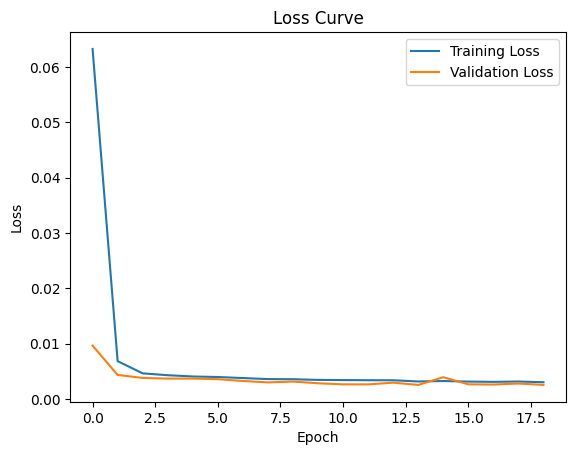

In [32]:
# Plot the loss curve
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.legend()
plt.show()

55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 997us/step


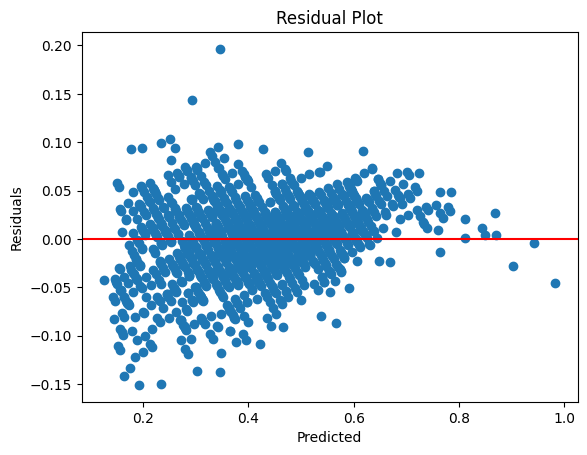

In [33]:
# Calculate residuals
y_pre = model.predict(X_test)
residuals = y_test - y_pre

# Create a residual plot
plt.scatter(y_pre, residuals)
plt.axhline(y=0, color='r', linestyle='-')
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

In [82]:
from mapie.metrics import regression_coverage_score_v2
def calculate_coverage_width(mapie_regressor, X_test, y_real):
    # sort the data
    y_pred, y_pis = mapie_regressor.predict(X_test, alpha=0.05)
    
    # Calculate the coverage and width of the prediction intervals
    coverage = regression_coverage_score(
    scaler_y.inverse_transform(y_real.reshape(-1, 1)),
    scaler_y.inverse_transform(y_pis[:, 0, 0].reshape(-1, 1)),
    scaler_y.inverse_transform(y_pis[:, 1, 0].reshape(-1, 1))
    )
    width = regression_mean_width_score(
    scaler_y.inverse_transform(y_pis[:, 0, 0].reshape(-1, 1)),
    scaler_y.inverse_transform(y_pis[:, 1, 0].reshape(-1, 1))
    )

    if len(y_pred) > 1:
        return coverage, width

    y_pred = scaler_y.inverse_transform(y_pred.reshape(-1, 1))[0]
    return y_pred, coverage, width

In [35]:
from tensorflow.keras.models import save_model
import pickle

# Wrapping the Keras model
model = KerasRegressor(model=create_ann,verbose=0)

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=150, batch_size=32, verbose=0, validation_data=(X_test, y_test), callbacks=[early_stopping])


# Create a MapieRegressor with the KerasRegressor as the base model
mapie_regressor = MapieRegressor(estimator=model)
mapie_regressor.fit(X_train, y_train)

test_coverage, test_width = calculate_coverage_width(mapie_regressor, X_test, y_test)

print(f"Based on test Coverage: {test_coverage * 100:.1f}% , width: {test_width}")

with open("trained_model.pkl", "wb") as f:
    pickle.dump(mapie_regressor, f)



Activation Function: relu, Hidden Units 1: 400, Hidden Units 2: 200


C:\Program Files\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Program Files\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Program Files\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Activation Function: relu, Hidden Units 1: 400, Hidden Units 2: 200
Activation Function: relu, Hidden Units 1: 400, Hidden Units 2: 200


C:\Program Files\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Activation Function: relu, Hidden Units 1: 400, Hidden Units 2: 200


C:\Program Files\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Activation Function: relu, Hidden Units 1: 400, Hidden Units 2: 200


C:\Program Files\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Activation Function: relu, Hidden Units 1: 400, Hidden Units 2: 200


C:\Program Files\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Activation Function: relu, Hidden Units 1: 400, Hidden Units 2: 200


C:\Program Files\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Based on test Coverage: 97.2% , width: 0.1829198535802949


C:\Program Files\Python312\Lib\site-packages\mapie\utils.py:598: UserWarning: WARNING: The predictions are ill-sorted.
  warnings.warn(


In [41]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
# Print column names
print(X.columns.tolist())

['Age', 'Potential', 'International Reputation', 'Weak Foot', 'Skill Moves', 'Value_float', 'Wage_float', 'CAM', 'CB', 'CDM', 'CF', 'CM', 'GK', 'LB', 'LM', 'LW', 'LWB', 'RB', 'RM', 'RW', 'RWB', 'ST']


In [42]:
# Set print options for numpy arrays
np.set_printoptions(precision=3, suppress=True)

# Reverse the scaled X_calibration
for i in range(X_cal.shape[0]):
    inversed_scaled_list = scaler_x.inverse_transform(np.array(X_cal[i]).reshape(1, -1)).flatten()
    inversed_scaled_y = scaler_y.inverse_transform(np.array(y_cal[i]).reshape(1, -1)).flatten()
    print(f"Sample {i+1}: X = {inversed_scaled_list}, y = {inversed_scaled_y}")

Sample 1: X = [24.    71.     1.     3.     2.     0.85   0.002  0.     1.     0.
  0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
  0.     0.   ], y = [67.]
Sample 2: X = [21.   81.    1.    3.    3.    1.9   0.03  0.    0.    0.    0.    0.
  0.    0.    0.    0.    0.    0.    0.    0.    0.    1.  ], y = [69.]
Sample 3: X = [25.    57.     1.     4.     2.     0.11   0.002  0.     0.     0.
  0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
  0.     1.   ], y = [55.]
Sample 4: X = [21.    66.     1.     2.     2.     0.11   0.004  0.     1.     0.
  0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
  0.     0.   ], y = [54.]
Sample 5: X = [22.    72.     1.     3.     2.     0.475  0.001  0.     0.     0.
  0.     0.     0.     0.     0.     0.     0.     1.     0.     0.
  0.     0.   ], y = [63.]
Sample 6: X = [30.    85.     3.     3.     3.    35.5    0.105  1.     0.     0.
  0.     0.     0.     0.     0.     0.     0.     0

In [83]:
import tkinter as tk
import customtkinter as ctk
import pandas as pd
import re
from tkinter import messagebox
from tensorflow.keras.models import load_model


class GUI:
    def __init__(self):
        ctk.set_appearance_mode('light')  # Set light appearance mode
        ctk.set_default_color_theme('dark-blue')
        window_width = 700  # Width of the window
        window_height = 700  # Height of the window
        self.root = ctk.CTk()
        self.root.title("Player overall prediction")
        # To make the window appear at the center of my screen
        screen_width = self.root.winfo_screenwidth()
        screen_height = self.root.winfo_screenheight()

        x = int((screen_width / 2) - (window_width / 2))
        y = int((screen_height / 2) - (window_height / 2))

        self.root.geometry(f"{window_width}x{window_height}+{x}+{y}")

        # Create the first frame (Frame 1) and make it fill the entire root window
        self.frame1 = ctk.CTkFrame(self.root)
        self.frame1.grid(row=0, column=0, sticky=tk.NSEW)

        # Create the second frame (Frame 2) and make it fill the entire root window
        self.frame2 = ctk.CTkFrame(self.root)
        self.frame2.grid(row=0, column=1, sticky=tk.NSEW)

        # Set the relative sizes of the frames
        self.root.grid_columnconfigure(0, weight=10)
        self.root.grid_columnconfigure(1, weight=4)

        # Adjust the size of Frame 1 and Frame 2 according to the ratio 2:1
        self.root.grid_rowconfigure(0, weight=1)

        # Set the content of Frame 1 and Frame 2
        self.set_frame1_content()
        self.set_frame2_content()

    def set_frame1_content(self):
        self.dataframe = self.read_csv_as_dataframe("fifa_data.csv")
            
        self.entries = []  # Initialize entries list
        self.label_names = []  # Initialize list to store label names
    
        self.label_entry_pairs = [
            ("Age", "int", ctk.CTkEntry(self.frame1, validate='key', validatecommand=(self.frame1.register(self.validate_float), '%P'))),
            ("Potential", "int", ctk.CTkEntry(self.frame1, validate='key', validatecommand=(self.frame1.register(self.validate_float), '%P'))),
            ("International Reputation", "float", ctk.CTkComboBox(self.frame1, values=sorted([str(val) for val in self.dataframe['International Reputation'].unique()]))),
            ("Weak Foot", "float", ctk.CTkComboBox(self.frame1, values=sorted([str(val) for val in self.dataframe['Weak Foot'].unique()]))),
            ("Skill Moves", "float", ctk.CTkComboBox(self.frame1, values=sorted([str(val) for val in self.dataframe['Skill Moves'].unique()]))),
            ("Value", "float", ctk.CTkEntry(self.frame1, validate='none')),  # No validation applied
            ("Wage", "float", ctk.CTkEntry(self.frame1, validate='none')),   # No validation applied
            ("Position", "object", ctk.CTkComboBox(self.frame1, values=sorted([str(val) for val in self.dataframe['Position'].unique()]))),
            ("Real Overall", "float", ctk.CTkEntry(self.frame1, validate='key', validatecommand=(self.frame1.register(self.validate_float), '%P')))
        ]
    
        for idx, (label, data_type, entry) in enumerate(self.label_entry_pairs):
            data_type = eval(data_type)
            label = ctk.CTkLabel(self.frame1, text=label)
            label.grid(row=idx, column=0, padx=10, pady=7, sticky=tk.W + tk.E)
            self.label_names.append(label)  # Append label name to list
            
            if label.cget("text") != 'Real Overall':
                if label == "Real Overall":
                    # For the "Real Overall" field, just create the entry widget without trying to get values from the dataframe
                    entry = ctk.CTkEntry(self.frame1, validate='key', validatecommand=(self.frame1.register(self.validate_float), '%P'))
                else:
                    # For other fields, populate the combobox with unique values from the dataframe
                    values = [str(val) for val in self.dataframe[label.cget("text")].unique() if not pd.isnull(val)]
                    entry = ctk.CTkComboBox(self.frame1, values=sorted(values))
            entry.grid(row=idx, column=1, padx=7, pady=7, sticky='e')
            self.entries.append(entry)  # Add entry widget to entries list


        # Add buttons
        get_values_button = ctk.CTkButton(self.frame1, text="Get Values", command=self.get_values)
        get_values_button.grid(row=idx+1, column=0, columnspan=2, padx=5, pady=10, sticky=tk.W + tk.E)

        reset_button = ctk.CTkButton(self.frame1, text="Reset Values", command=self.reset_values)
        reset_button.grid(row=idx+2, column=0, columnspan=2, padx=5, pady=10, sticky=tk.W + tk.E)

        exit_button = ctk.CTkButton(self.frame1, text="Exit", command=self.exit_app)
        exit_button.grid(row=idx+3, column=0, columnspan=2, padx=5, pady=10, sticky=tk.W + tk.E)

    def set_frame2_content(self):
        # Content of Frame 2
        self.values_label = ctk.CTkLabel(self.frame2, text="")
        self.values_label.pack(fill='both', expand=True, pady=20)



    def get_position(self, text):
        if text in ['RCB', 'LCB']:
            return 'CB'
        elif text in ['RDM', 'LDM']:
            return 'CDM'
        elif text in ['RCM', 'LCM']:
            return 'CM'
        elif text in ['RS', 'LS']:
            return 'ST'
        elif text in ['RAM', 'LAM']:
            return 'CAM'
        elif text in ['RF', 'LF']:
            return 'CF'
        else:
            return text
         
            
    def value_to_float(self, text):
        if 'K' in text:
            value = 0.001
        else:
            value = 1
        text_stripped = re.sub(r'[\$\s\,M]', '', str(text))  # Ensure text is converted to string
        numeric_values = [float(match) for match in re.findall(r'\d+\.\d+|\d+', text_stripped)]
        return sum(numeric_values) * value if numeric_values else None
     
        
        
    def read_csv_as_dataframe(self, filename):
        try:
            dataframe = pd.read_csv(filename)
            return self.apply_processing1(dataframe)  # Apply data processing
        except FileNotFoundError:
            print(f"File '{filename}' not found.")
            return None
        

    def apply_processing1(self, df):
        # Drop unnecessary columns
        columns_to_drop = ['ID', 'Name','Overall' , 'Photo', 'Nationality', 'Flag', 'Club', 'Club Logo', 'Special', 'Preferred Foot', 'Work Rate',
                        'Body Type', 'Real Face', 'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until', 'Height', 'Weight',
                        'Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
                        'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
                        'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB',
                        'Volleys', 'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility',
                        'Reactions', 'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression', 'Interceptions',
                        'Positioning', 'Vision', 'Penalties', 'Composure', 'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
                        'GKKicking', 'GKPositioning', 'GKReflexes', 'Release Clause', 'Unnamed: 0']
        df = df.drop(columns=columns_to_drop, axis=1)
        df['Position'] = df['Position'].apply(self.get_position)
        return df
    
    
    def apply_processing2(self, df):
        df['Position'] = df['Position'].apply(self.get_position)
        df['Value'] = df['Value'].apply(self.value_to_float)
        df['Wage'] = df['Wage'].apply(self.value_to_float)
        
        df_dummies = pd.get_dummies(df['Position'])
        df = pd.concat([df, df_dummies], axis=1)
        df.drop('Position', axis=1, inplace=True)
        df.drop('Real Overall', axis=1, inplace=True)
        
        
        # Column to move
        column_to_move = 'Value'
        column_to_move2 = 'Wage'
        # Column after which to move
        after_column = 'Skill Moves'
        after_column2 = column_to_move
        
        # Get the list of columns
        columns = list(df.columns)
        
        # Remove the column to move from its current position
        columns.remove(column_to_move)
        
        # Find the index of the column after which to move
        index = columns.index(after_column) + 1
        
        # Insert the column to move at the desired position
        columns.insert(index, column_to_move)
        
        # Reorder the columns in the DataFrame
        df = df[columns]

        columns.remove(column_to_move2)
        index = columns.index(after_column2) + 1
        columns.insert(index, column_to_move2)

        # Reorder the columns in the DataFrame
        df = df[columns]
        df = df.iloc[-1]
        df = np.array([df.tolist()])
        
        return df

    def process_values_type(self, df):
        result = [[float(element) if element.replace('.', '', 1).isdigit() else (element == 'True') if element in ['True', 'False'] else element for element in sub_list] for sub_list in df]
        result = np.array(result)

        x_scaled1 = scaler_x.transform(result)
        
        return x_scaled1
    
    def get_values(self):
        # Create a dictionary with empty lists for each column
        data = {
            'Age': [0],
            'Potential': [0],
            'International Reputation': [0.0],
            'Weak Foot': [0.0],
            'Skill Moves': [0.0],
            'Value': [0.0],
            'Wage': [0.0],
            'Position': [''],
            'Real Overall': [0.0]  # Add 'Real Overall' to the dictionary
        }

        # Create a DataFrame from the dictionary
        self.df = self.read_csv_as_dataframe("fifa_data.csv")

        # Check if any entry is empty
        if any(entry.get() == '' for entry in self.entries):
            # If any entry is empty, display a message
            messagebox.showwarning("Empty Entries", "Please fill all entries before getting values.")
            return

        for idx, entry in enumerate(self.entries):
            if self.label_names[idx].cget("text") != 'Real Overall':
                data[self.label_names[idx].cget("text")] = entry.get()
        
        # Clear the previous values displayed in frame2
        for child in self.frame2.winfo_children():
            child.destroy()

        values = [entry.get() for entry in self.entries]
        labels_name = []
        data_types = []

        for idx, (label, data_type, entry) in enumerate(self.label_entry_pairs):
            labels_name.append(label)
            data_types.append(data_type)

        # print(labels_name)
        # print(data_types)

        # Display values in frame2
        for idx, value in enumerate(values):
            data[f'{labels_name[idx]}'] = value
            label = ctk.CTkLabel(self.frame2, text=f"{labels_name[idx]} {idx + 1}: {value}")
            label.grid(row=idx, column=0, sticky='nw', padx=5)
            self.frame2.grid_rowconfigure(idx, weight=1)

        
        data = pd.DataFrame([data])
        self.df = pd.concat([self.df, data], ignore_index=True)
        self.df = self.apply_processing2(self.df)
        self.df = self.process_values_type(self.df)

        # # Load the trained model
        # model = load_model("trained_model.h5")
        # Load the saved model
        with open("trained_model.pkl", "rb") as f:
            saved_model = pickle.load(f)

        real_overall = data.get('Real Overall').values[0]
        scaled_real_overall = scaler_y.transform(np.array(real_overall).reshape(1, -1))

        # Make predictions on the DataFrame
        predicted_y, coverage, width = calculate_coverage_width(saved_model, self.df , scaled_real_overall)
        rounded_predicted_y = round(predicted_y[0], 0)
        
       # Display the predictions
        label = ctk.CTkLabel(self.frame2, text=f"{coverage * 100:.1f}%") # Coverage dispaly
        label.grid(row=len(self.entries) + len(predicted_y) + 3, column=1, sticky='nw', padx=5)
        self.frame2.grid_rowconfigure(len(self.entries) + len(predicted_y) + 3, weight=1)
        
        # Ensure the "Player Overall" label appears under the predictions
        label1 = ctk.CTkLabel(self.frame2, text="Coverage Probability:", font=('Berlin Sans FB Demi', 20, 'bold'))
        label1.grid(row=len(self.entries) + len(predicted_y) + 3, column=0, sticky='nw', padx=5)
        
        # Configure row weights for additional labels
        self.frame2.grid_rowconfigure(len(self.entries) + len(predicted_y) + 3, weight=10)
        self.frame2.grid_rowconfigure(len(self.entries) + 1, weight=10)

        label2 = ctk.CTkLabel(self.frame2, text="Player Overall:", font=('Berlin Sans FB Demi', 20, 'bold'))
        label2.grid(row=len(self.entries) + 3, column=0, sticky='nw', padx=5)

        labe3 = ctk.CTkLabel(self.frame2, text=f"{rounded_predicted_y}") # prediction display
        labe3.grid(row=len(self.entries) + 3, column=1, sticky='nw', padx=5)
        self.frame2.grid_rowconfigure(len(self.entries) + 3, weight=1)

        label4 = ctk.CTkLabel(self.frame2, text="Width:", font=('Berlin Sans FB Demi', 20, 'bold'))
        label4.grid(row=len(self.entries) + len(predicted_y) + 4, column=0, sticky='nw', padx=5)
        
        label5 = ctk.CTkLabel(self.frame2, text=f"{width:.2f}") # Width display
        label5.grid(row=len(self.entries) + len(predicted_y) + 4, column=1, sticky='nw', padx=5)
        self.frame2.grid_rowconfigure(len(self.entries) + len(predicted_y) + 3, weight=1)


    def reset_values(self):
        # Clear the values displayed in frame2
        for child in self.frame2.winfo_children():
            child.destroy()

    def exit_app(self):
        self.root.destroy()  # Destroy the Tkinter window
        self.root.quit()  # Quit the main loop of the Tkinter application

    
    def validate_float(self, new_value):
        if new_value == '':
            return True
        try:
            float(new_value)
            return True
        except ValueError:
            return False

# Instantiate and run the GUI
gui = GUI()
gui.root.update_idletasks()  # Ensure all widgets are added before resizing
gui.root.mainloop()


C:\Program Files\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Program Files\Python312\Lib\site-packages\mapie\utils.py:598: UserWarning: WARNING: The predictions are ill-sorted.
  warnings.warn(
